In [1]:
from measure_2d import*
from Homotopy_SFW_KL_2D import*
from Homotopy_SFW_L2_2D import*

In [2]:
import numpy as np
from scipy import integrate
import scipy.signal
import scipy

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable

import pandas as pd

In [3]:
def plot_results_homotopy(m, acquis, X_domain, Y_domain, sigma, certificate, 
                          energy, lambda_seq, sigma_seq, pen_seq, gt=Measure2D([], [])):
    if m.a.size > 0:
        fig = plt.figure(figsize=(20,5))
#         fig.suptitle(f'Reconstruction for $\lambda = {lambda_regul:.0e}$ ' + 
#                      f'and $\sigma_B = {niveau_bruits:.0e}$', fontsize=20)

        plt.subplot(131)
        cont1 = plt.contourf(X_domain, Y_domain, acquis, 100) #, cmap='seismic'
        plt.axis('square')
        plt.colorbar();
        plt.scatter(gt.x[:,0], gt.x[:,1], marker='x', c='white', s=100,
                        label='GT spikes')
        plt.scatter(m.x[:,0], m.x[:,1], marker='+', c='red', s=100,
                    label='Recovered spikes')
        plt.legend(loc=2)
        plt.title('Acquisition', fontsize=15)
        
        plt.subplot(132)
        cont2 = plt.contourf(X_domain, Y_domain, m.kernel(X_domain, Y_domain, sigma), 100)#, cmap='seismic'
        plt.axis('square')
        plt.title('$\Phi\mu_{rec}$', fontsize=15)
        plt.colorbar();
        
        plt.subplot(133)
        cont3 = plt.contourf(X_domain, Y_domain, certificate, 100) #,cmap='seismic'
        plt.axis('square')
        plt.title('Certificate', fontsize=15)
        plt.colorbar();      
        
        fig = plt.figure(figsize=(20,5))
        
        plt.subplot(141)
        plt.plot(lambda_seq, 'o--', color='black', linewidth=2.5)
        plt.xlabel('Homotopy iteration t', fontsize=12)
#         plt.ylabel('$\lambda(k)$', fontsize=15)
        plt.title('Lambda estimated $\lambda(t)$', fontsize=15)
        plt.grid()
               
        plt.subplot(142)
        plt.plot(sigma_seq, 'o--', color='black', linewidth=2.5)
        plt.xlabel('Homotopy iteration t', fontsize=12)
#         plt.ylabel('$\sigma_t(k)$', fontsize=15)
        plt.title('$\sigma_t$ sequence', fontsize=15)
        plt.grid()
        
        plt.subplot(143)
        plt.plot(energy, 'o--', color='black', linewidth=2.5)
        plt.xlabel('Homotopy iteration t', fontsize=12)
#         plt.ylabel('$T_\lambda(k)$', fontsize=15)
        plt.title('Energy $T_\lambda$', fontsize=15)
        plt.grid()
        plt.subplot(144)
        plt.plot(pen_seq, 'o--', color='black', linewidth=2.5)
        plt.xlabel('Homotopy iteration t', fontsize=12)
#         plt.ylabel('Penalty', fontsize=15)
        plt.title('Penalty', fontsize=15)
        plt.grid()

<>:22: SyntaxWarning: invalid escape sequence '\P'
<>:37: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:51: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\P'
<>:37: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:51: SyntaxWarning: invalid escape sequence '\l'
C:\Users\gabri\AppData\Local\Temp\ipykernel_9908\3886555977.py:22: SyntaxWarning: invalid escape sequence '\P'
  plt.title('$\Phi\mu_{rec}$', fontsize=15)
C:\Users\gabri\AppData\Local\Temp\ipykernel_9908\3886555977.py:37: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Lambda estimated $\lambda(t)$', fontsize=15)
C:\Users\gabri\AppData\Local\Temp\ipykernel_9908\3886555977.py:44: SyntaxWarning: invalid escape sequence '\s'
  plt.title('$\sigma_t$ sequence', fontsize=15)
C:\Users\gabri\AppData\Local\Temp\ipykernel_9908\3886555977.py:51: SyntaxWarning: invalid escape sequence '\l

In [4]:
np.random.seed(70)
sigma = 7e-2 # PSF spread factor
noise_level_poisson = 10

N_ech = 128
xleft = 0
xright = 1
X_grid = np.linspace(xleft, xright, N_ech)
X, Y = np.meshgrid(X_grid, X_grid)

X_grid_big = np.linspace(xleft-xright, xright, 2*N_ech - 1)
X_big, Y_big = np.meshgrid(X_grid_big, X_grid_big)

X_grid_certif = np.linspace(xleft, xright, N_ech+1)
X_certif, Y_certif = np.meshgrid(X_grid_certif, X_grid_certif)

m_ax0 = random_measure_2d(15,0.25)
# m_ax0 = Measure2D([1.1,1,0.8],[[0.1,0.1],[0.8,0.9],[0.75,0.45]])
y0 = m_ax0.kernel(X,Y,sigma)
bg = 0.05 
# y = m_ax0.acquisition(X, Y, sigma, bg, noise_level_gauss, noiseType='Gaussian')
y = m_ax0.acquisition(X, Y, sigma, bg, noise_level_poisson, noiseType='Poisson')+1e-8

C:\Users\gabri\AppData\Local\Temp\ipykernel_9908\861520084.py:4: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in cont1.collections:
C:\Users\gabri\AppData\Local\Temp\ipykernel_9908\861520084.py:15: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in cont1.collections:


Text(0, 0.5, 'Y')

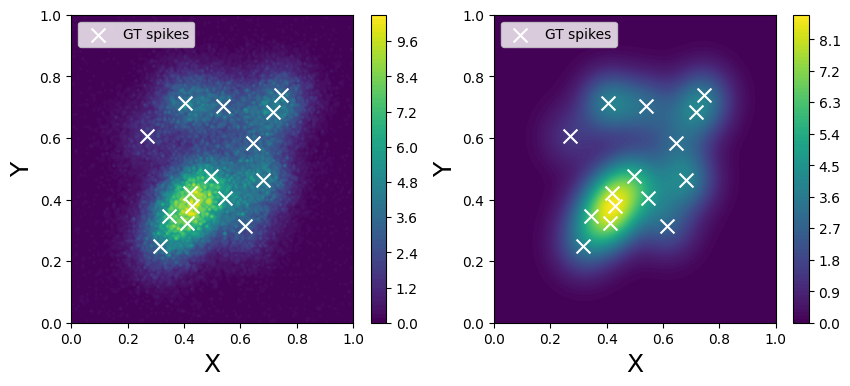

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(121)
cont1 = plt.contourf(X, Y, y, 100) #, cmap='seismic'
for c in cont1.collections:
    c.set_edgecolor("face")
plt.colorbar();
plt.scatter(m_ax0.x[:,0], m_ax0.x[:,1], marker='x', c='white', s=100,
                        label='GT spikes')
plt.legend(loc=2)
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=18)
# plt.title('Acquisition $y = \Phi m_{a_0,x_0} + w$', fontsize=20)
plt.subplot(122)
cont1 = plt.contourf(X, Y, y0, 100) #, cmap='seismic'
for c in cont1.collections:
    c.set_edgecolor("face")
plt.colorbar();
plt.scatter(m_ax0.x[:,0], m_ax0.x[:,1], marker='x', c='white', s=100,
                        label='GT spikes')
plt.legend(loc=2)
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=18)
# plt.title('Acquisition $y = \Phi m_{a_0,x_0} + w$', fontsize=20)

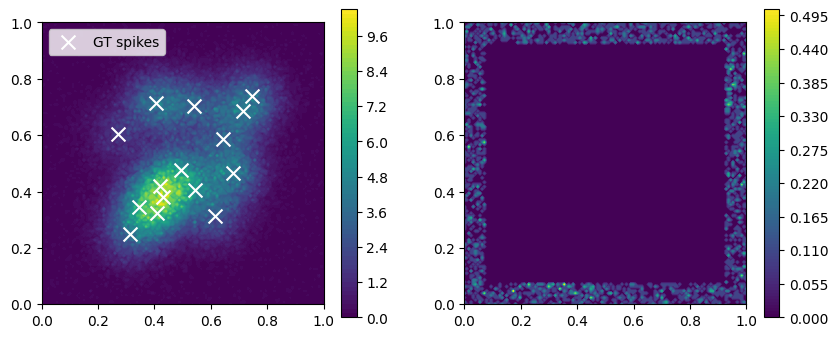

In [6]:
# Create a new array with the same shape and dtype
outer_part = np.zeros_like(y)
margin = 10
# Copy the outer part into the new array
outer_part[0:margin, :] = y[0:margin, :]
outer_part[:, 0:margin] = y[:, 0:margin]
outer_part[N_ech-margin:N_ech, :] = y[N_ech-margin:N_ech, :]
outer_part[:,N_ech-margin:N_ech] = y[:,N_ech-margin:N_ech]
plt.figure(figsize=(10, 4))
plt.subplot(121)
cont1 = plt.contourf(X, Y, y, 100) #, cmap='seismic'
plt.axis('square')
plt.colorbar();
plt.scatter(m_ax0.x[:,0], m_ax0.x[:,1], marker='x', c='white', s=100,
                        label='GT spikes')
plt.legend(loc=2)
plt.subplot(122)
cont1 = plt.contourf(X, Y, outer_part, 100) #, cmap='seismic'
plt.axis('square')
plt.colorbar();
plt.show()

In [7]:
# estimate of the background value
bg_est = np.mean(outer_part[outer_part!=0])

# compute D_kl over the background
m = Measure2D([],[])
aus = m.kernel(X, Y, sigma)
aus = aus[outer_part != 0]
non_zero_elements = outer_part[outer_part != 0]
sigma_noise_bg = np.sum(aus+bg_est-non_zero_elements+non_zero_elements*np.log(non_zero_elements) - non_zero_elements*np.log(aus+bg_est))

np.float64(0.05449153542372882)

In [12]:
sigma_target_bertero = np.shape(y)[0]*np.shape(y)[1]/2
sigma_target_KL = KLTV_cost_funct(m_ax0, y, bg, 0, sigma, X, Y)
sigma_target_est = (sigma_target_bertero*2)*(sigma_noise_bg/len(non_zero_elements))

In [31]:
# Create a DataFrame
data = {
    'Estimation of sigma target ': [
        'M/2', 'Theoretical value given by KL ', 'Estimation'
    ],
    ' ': [
        sigma_target_bertero, sigma_target_KL, sigma_target_est
    ]
}

df = pd.DataFrame(data)
display(df)

,Estimation of sigma target,
0,M/2,8192.000000
1,Theoretical value given by KL,842.308130
2,Estimation,846.431326


In [26]:
(m_sfw_KL, nrj_sfw_KL, lmb_sfw_KL, sig_seq_KL, fid_KL, pen_KL) = Homotopy_SFW_KULLBACK_2D(y, bg, sigma, 1.05*sigma_target_est, X, Y, X_big, Y_big,
                                               ker='gaussian', m_0=m, nnIter=20, nIter=1, c=30, sliding = 1, 
                                                     pruning = 1, verbose=True, plots=False, gt=m_ax0)

sigma_target = 888.7528925001363


*** Homotopy iteration n.0 ***
max of certificate=0.407284288205362
lambda=0.407284288205362

Iteration n. 1
New position x^* index [0.4296875 0.3828125] max value of certificate = 5.0
Insertion step
* a_k_demi : [8.49]
* x_k_demi : [[0.43 0.38]]
Sliding step performed at iteration 1
* x_k : [[0.4713 0.4071]]
* a_k : [9.0287]
Pruning performed at iteration 1
* x_k : [[0.4713 0.4071]]
* a_k : [9.0287]
* Energy : 24998.162

---- Stopping criterion: End for ----
sigma_t=24994.484873260782
* Energy : 24998.162


*** Homotopy iteration n.1 ***
max of certificate=2.2352749549391735
lambda=0.45519618448283694

Iteration n. 1
New position x^* index [0.6875    0.6796875] max value of certificate = 2.0
Insertion step
* a_k_demi : [8.4 4. ]
* x_k_demi : [[0.47 0.41]
 [0.69 0.68]]
Sliding step performed at iteration 1
* x_k : [[0.4383 0.3728]
 [0.6239 0.6384]]
* a_k : [7.6405 5.1569]
Pruning performed at iteration 1
* x_k : [[0.4383 0.3728]
 [0.6239 0.6384]]
* a_

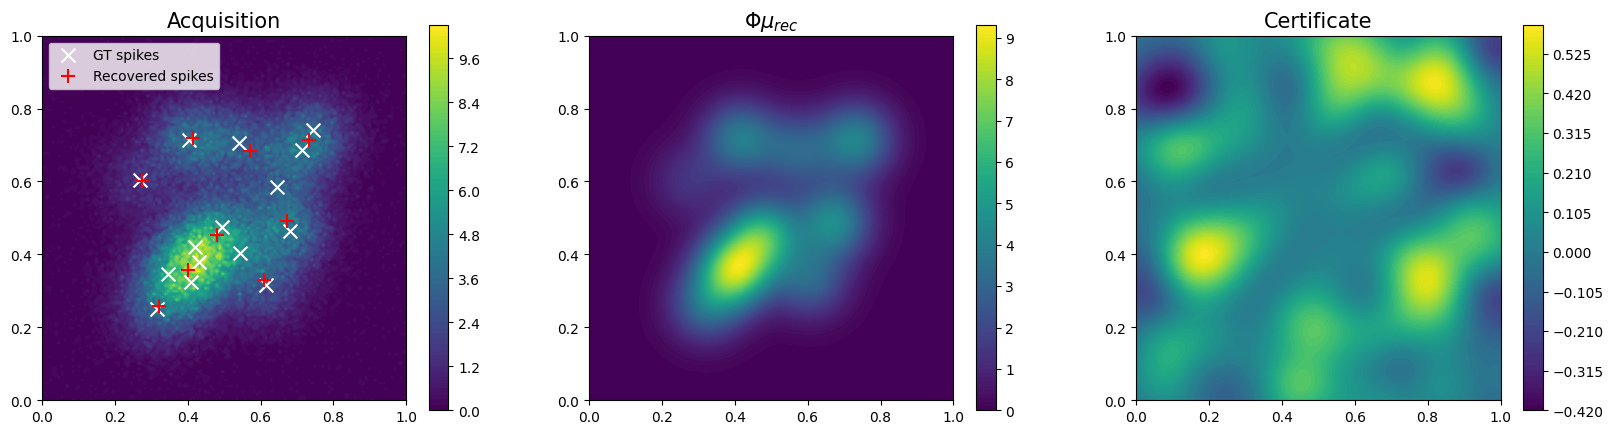

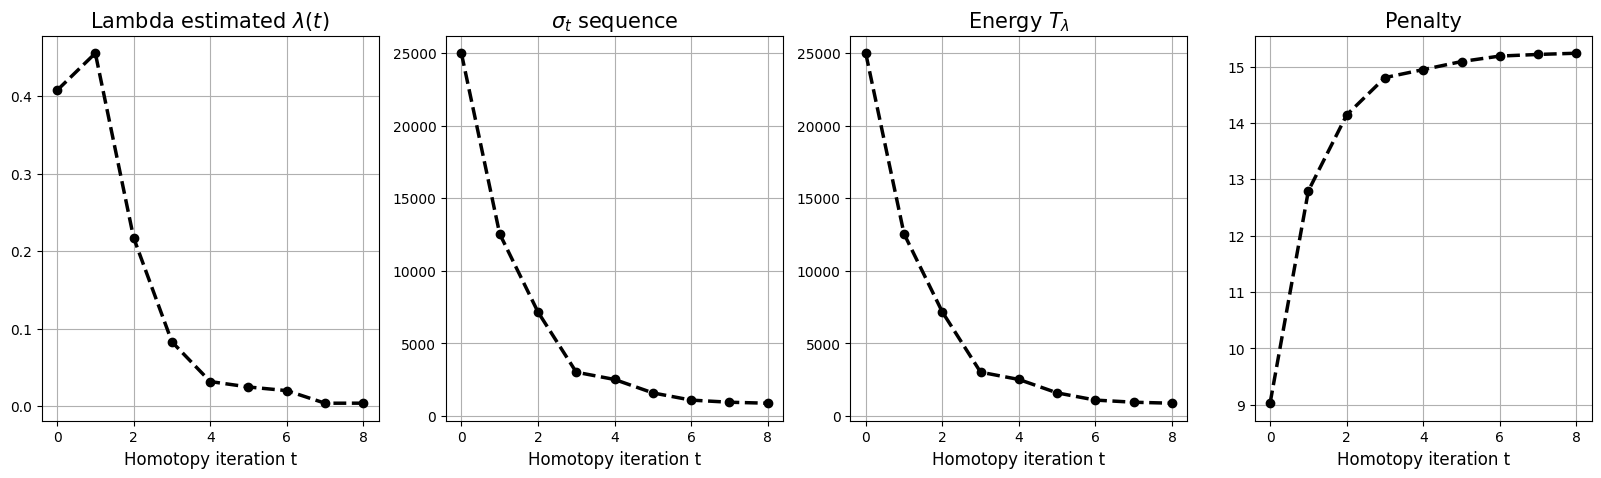

In [ ]:
certificat_KL = etak_KL(m_sfw_KL, y, bg, lmb_sfw_KL[-1], sigma, X, Y, X_big, Y_big)
plot_results_homotopy(m_sfw_KL, y, X, Y, sigma, certificat_KL, 
                          nrj_sfw_KL, lmb_sfw_KL, sig_seq_KL, pen_KL, m_ax0)

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\gabri\AppData\Local\Temp\ipykernel_9908\1805960549.py:4: SyntaxWarning: invalid escape sequence '\m'
  label='$\mu_{a,x}$', linefmt='C2--', markerfmt='C2o', basefmt=" ")
C:\Users\gabri\AppData\Local\Temp\ipykernel_9908\1805960549.py:6: SyntaxWarning: invalid escape sequence '\m'
  linefmt='black', markerfmt='kD',label='$\mu_{a_0,x_0}$', basefmt=" ")


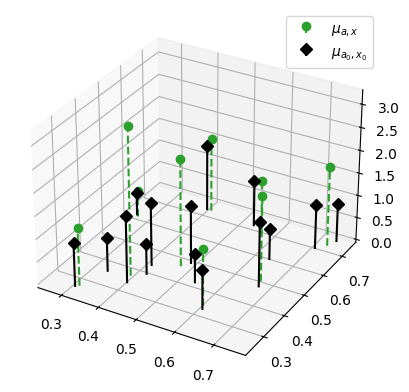

In [32]:
fig, ax = plt.subplots(subplot_kw=dict(projection="3d", computed_zorder=False))

markerline, stemlines, baseline = ax.stem(m_sfw_KL.x[:,0], m_sfw_KL.x[:,1], m_sfw_KL.a,
                                          label='$\mu_{a,x}$', linefmt='C2--', markerfmt='C2o', basefmt=" ")
markerline, stemlines, baseline = ax.stem(m_ax0.x[:,0], m_ax0.x[:,1], m_ax0.a,
                                          linefmt='black', markerfmt='kD',label='$\mu_{a_0,x_0}$', basefmt=" ")

#ax.view_init(60, 90)
plt.legend()
plt.show()



<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
C:\Users\gabri\AppData\Local\Temp\ipykernel_9908\748907167.py:12: SyntaxWarning: invalid escape sequence '\m'
  markerline, stemlines, baseline = ax.stem(m_sfw_KL.x[:,0], m_sfw_KL.x[:,1], 1.5*m_sfw_KL.a, label='$\mu_{a,x}$', linefmt='C2--', markerfmt='C2o', basefmt=" ")
C:\Users\gabri\AppData\Local\Temp\ipykernel_9908\748907167.py:14: SyntaxWarning: invalid escape sequence '\m'
  markerline, stemlines, baseline = ax.stem(m_ax0.x[:,0], m_ax0.x[:,1], 1.5*m_ax0.a, linefmt='black', markerfmt='kD',label='$\mu_{a_0,x_0}$', basefmt=" ")


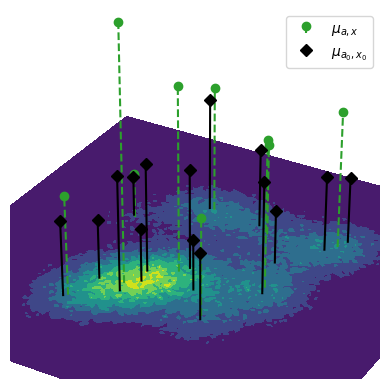

In [33]:
fig, ax = plt.subplots(subplot_kw=dict(projection="3d", computed_zorder=False))

ax.contourf(
    X,
    Y,
    y,
    zdir="z",
    offset=-0.0,
)


markerline, stemlines, baseline = ax.stem(m_sfw_KL.x[:,0], m_sfw_KL.x[:,1], 1.5*m_sfw_KL.a, label='$\mu_{a,x}$', linefmt='C2--', markerfmt='C2o', basefmt=" ")

markerline, stemlines, baseline = ax.stem(m_ax0.x[:,0], m_ax0.x[:,1], 1.5*m_ax0.a, linefmt='black', markerfmt='kD',label='$\mu_{a_0,x_0}$', basefmt=" ")

ax.set_xlim(0.25, 0.76)
ax.set_ylim(0.25, 0.75)
ax.set_zlim(0, 3)
# ax.view_init(45, 45)

ax.grid(False)  # Turn off the grid
ax.axis('off')   # Turn off the axis and axis labels

plt.legend()
plt.show()



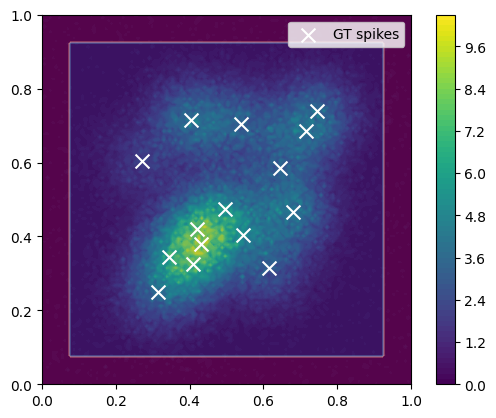

In [34]:
# Create a new array with the same shape and dtype
outer_part_aux = outer_part
margin = 10
# Copy the outer part into the new array
outer_part_aux[0:margin, :] = 1
outer_part_aux[:, 0:margin] = 1
outer_part_aux[N_ech-margin:N_ech, :] = 1
outer_part_aux[:,N_ech-margin:N_ech] = 1

ar = np.zeros_like(y)
ar[outer_part_aux==1] = 0
ar[outer_part_aux==0] = 1

plt.figure()

# Assuming 'y' and 'ar' are your images to be shown with transparency
plt.contourf(X, Y, y, 100) #, cmap='seismic'
plt.axis('square')
plt.colorbar()
plt.contourf(X,Y,ar, alpha=0.2, cmap="RdBu")
plt.scatter(m_ax0.x[:,0], m_ax0.x[:,1], marker='x', c='white', s=100,
                        label='GT spikes')
# Legend
plt.legend()

plt.show()
